In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [16]:
df_csv = pd.read_csv('Sales Dataset.csv')
df_csv.head(3)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07


In [35]:
data = load_wine(as_frame=True)
df = data.frame

In [36]:
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [38]:
df.shape

(178, 14)

In [39]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [40]:
df.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
target                            3
dtype: int64

In [41]:
df['target'].unique()

array([0, 1, 2])

In [42]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


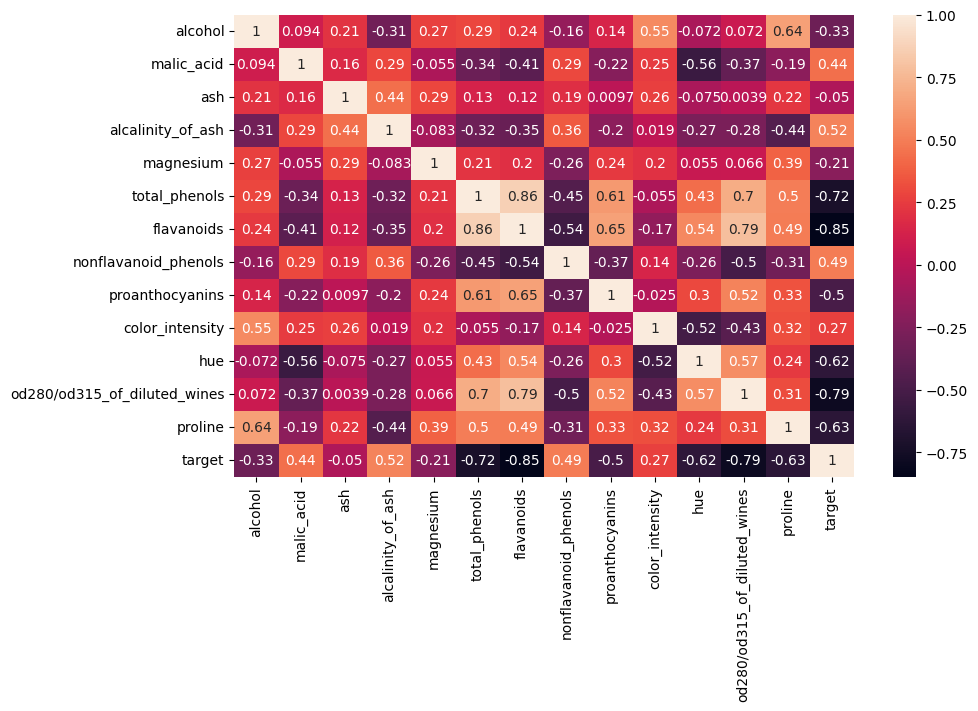

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='target', ylabel='Count'>

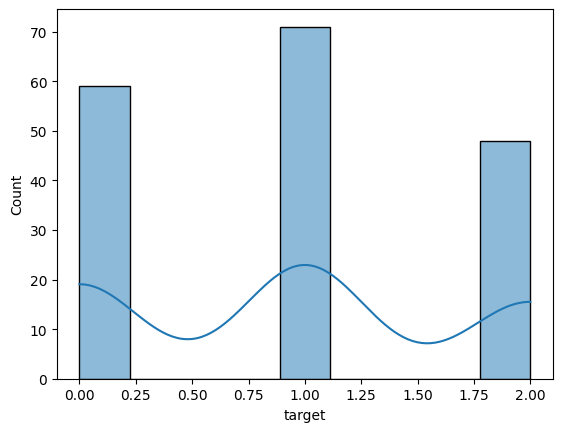

In [45]:
sns.histplot(df['target'], kde=True)

<Axes: >

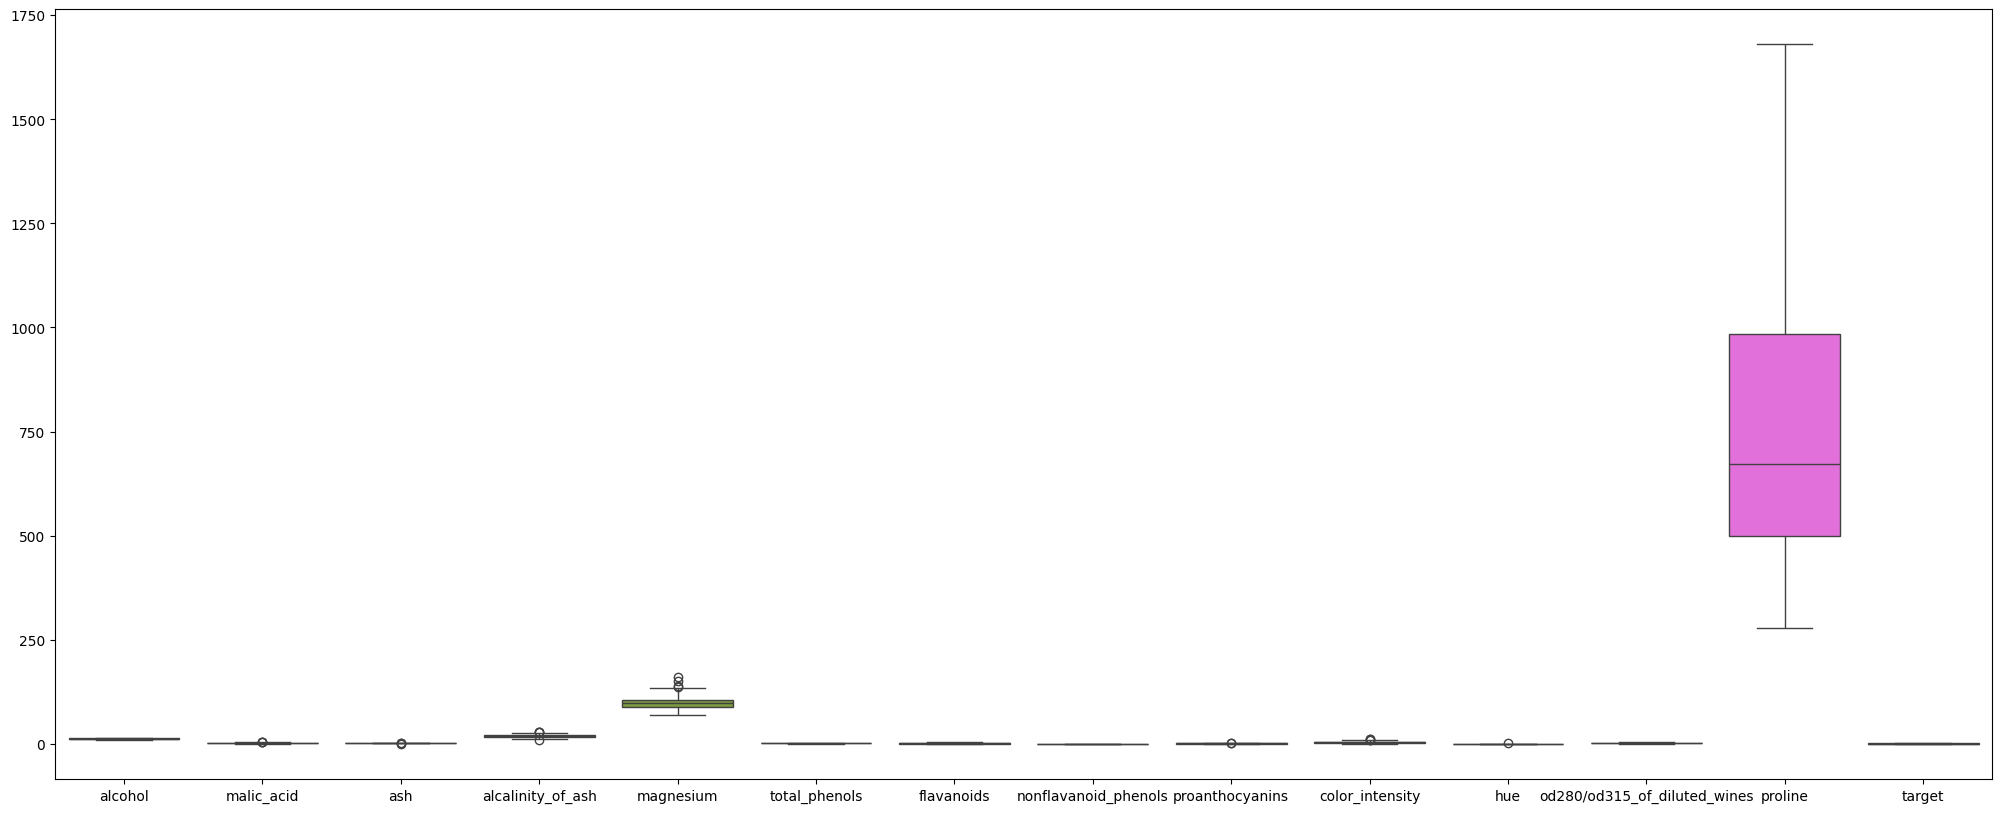

In [50]:
plt.figure(figsize=(25,10))
sns.boxplot(df)

In [51]:
# Funçao para outliers
def df_limpar(columns, df):
    Q1, Q3 = np.percentile(df[columns], [25, 75])
    IRQ = Q3 - Q1
    limite_inferior = Q1 - (1.5 * IRQ)
    limite_superior = Q3 + (1.5 * IRQ)
    df_limpo = df[(df[columns] >= limite_inferior)&(df[columns] <= limite_superior)]
    return df_limpo

In [48]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [52]:
df_limpo = df_limpar('malic_acid', df)
df_limpo = df_limpar('ash', df)
df_limpo = df_limpar('alcalinity_of_ash', df)
df_limpo = df_limpar('magnesium', df)
df_limpo = df_limpar('proanthocyanins', df)
df_limpo = df_limpar('color_intensity', df)
df_limpo = df_limpar('hue', df)

<Axes: >

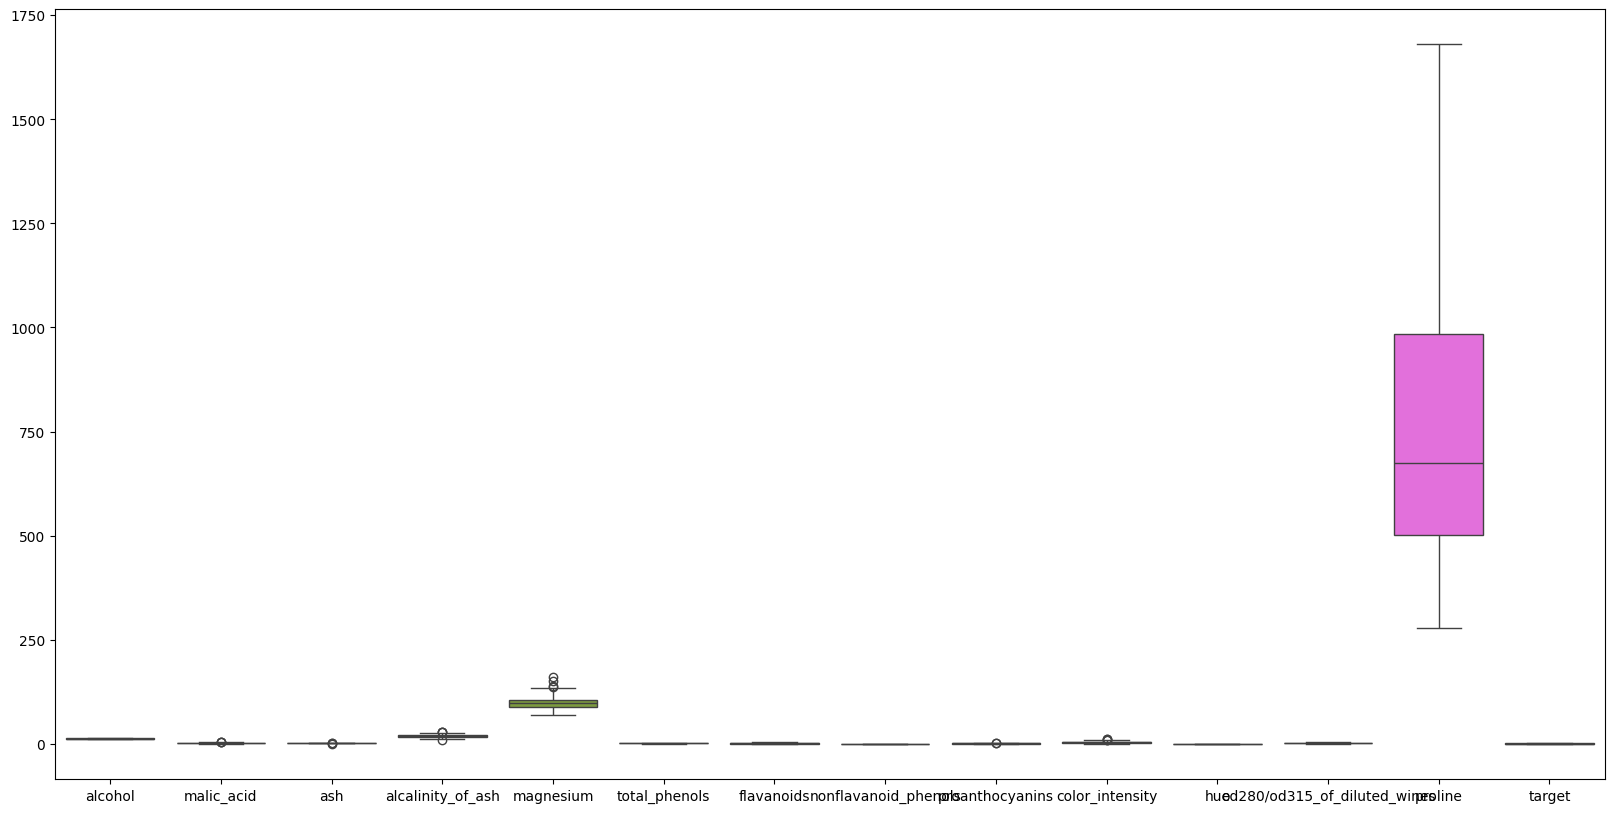

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(df_limpo)

<Axes: >

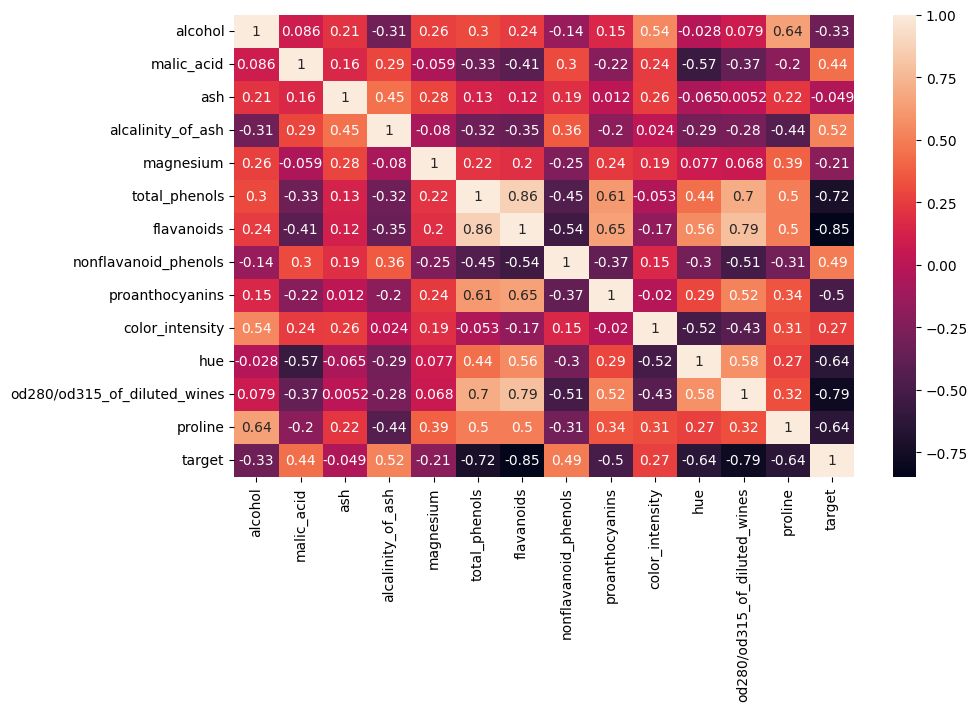

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df_limpo.corr(), annot=True)

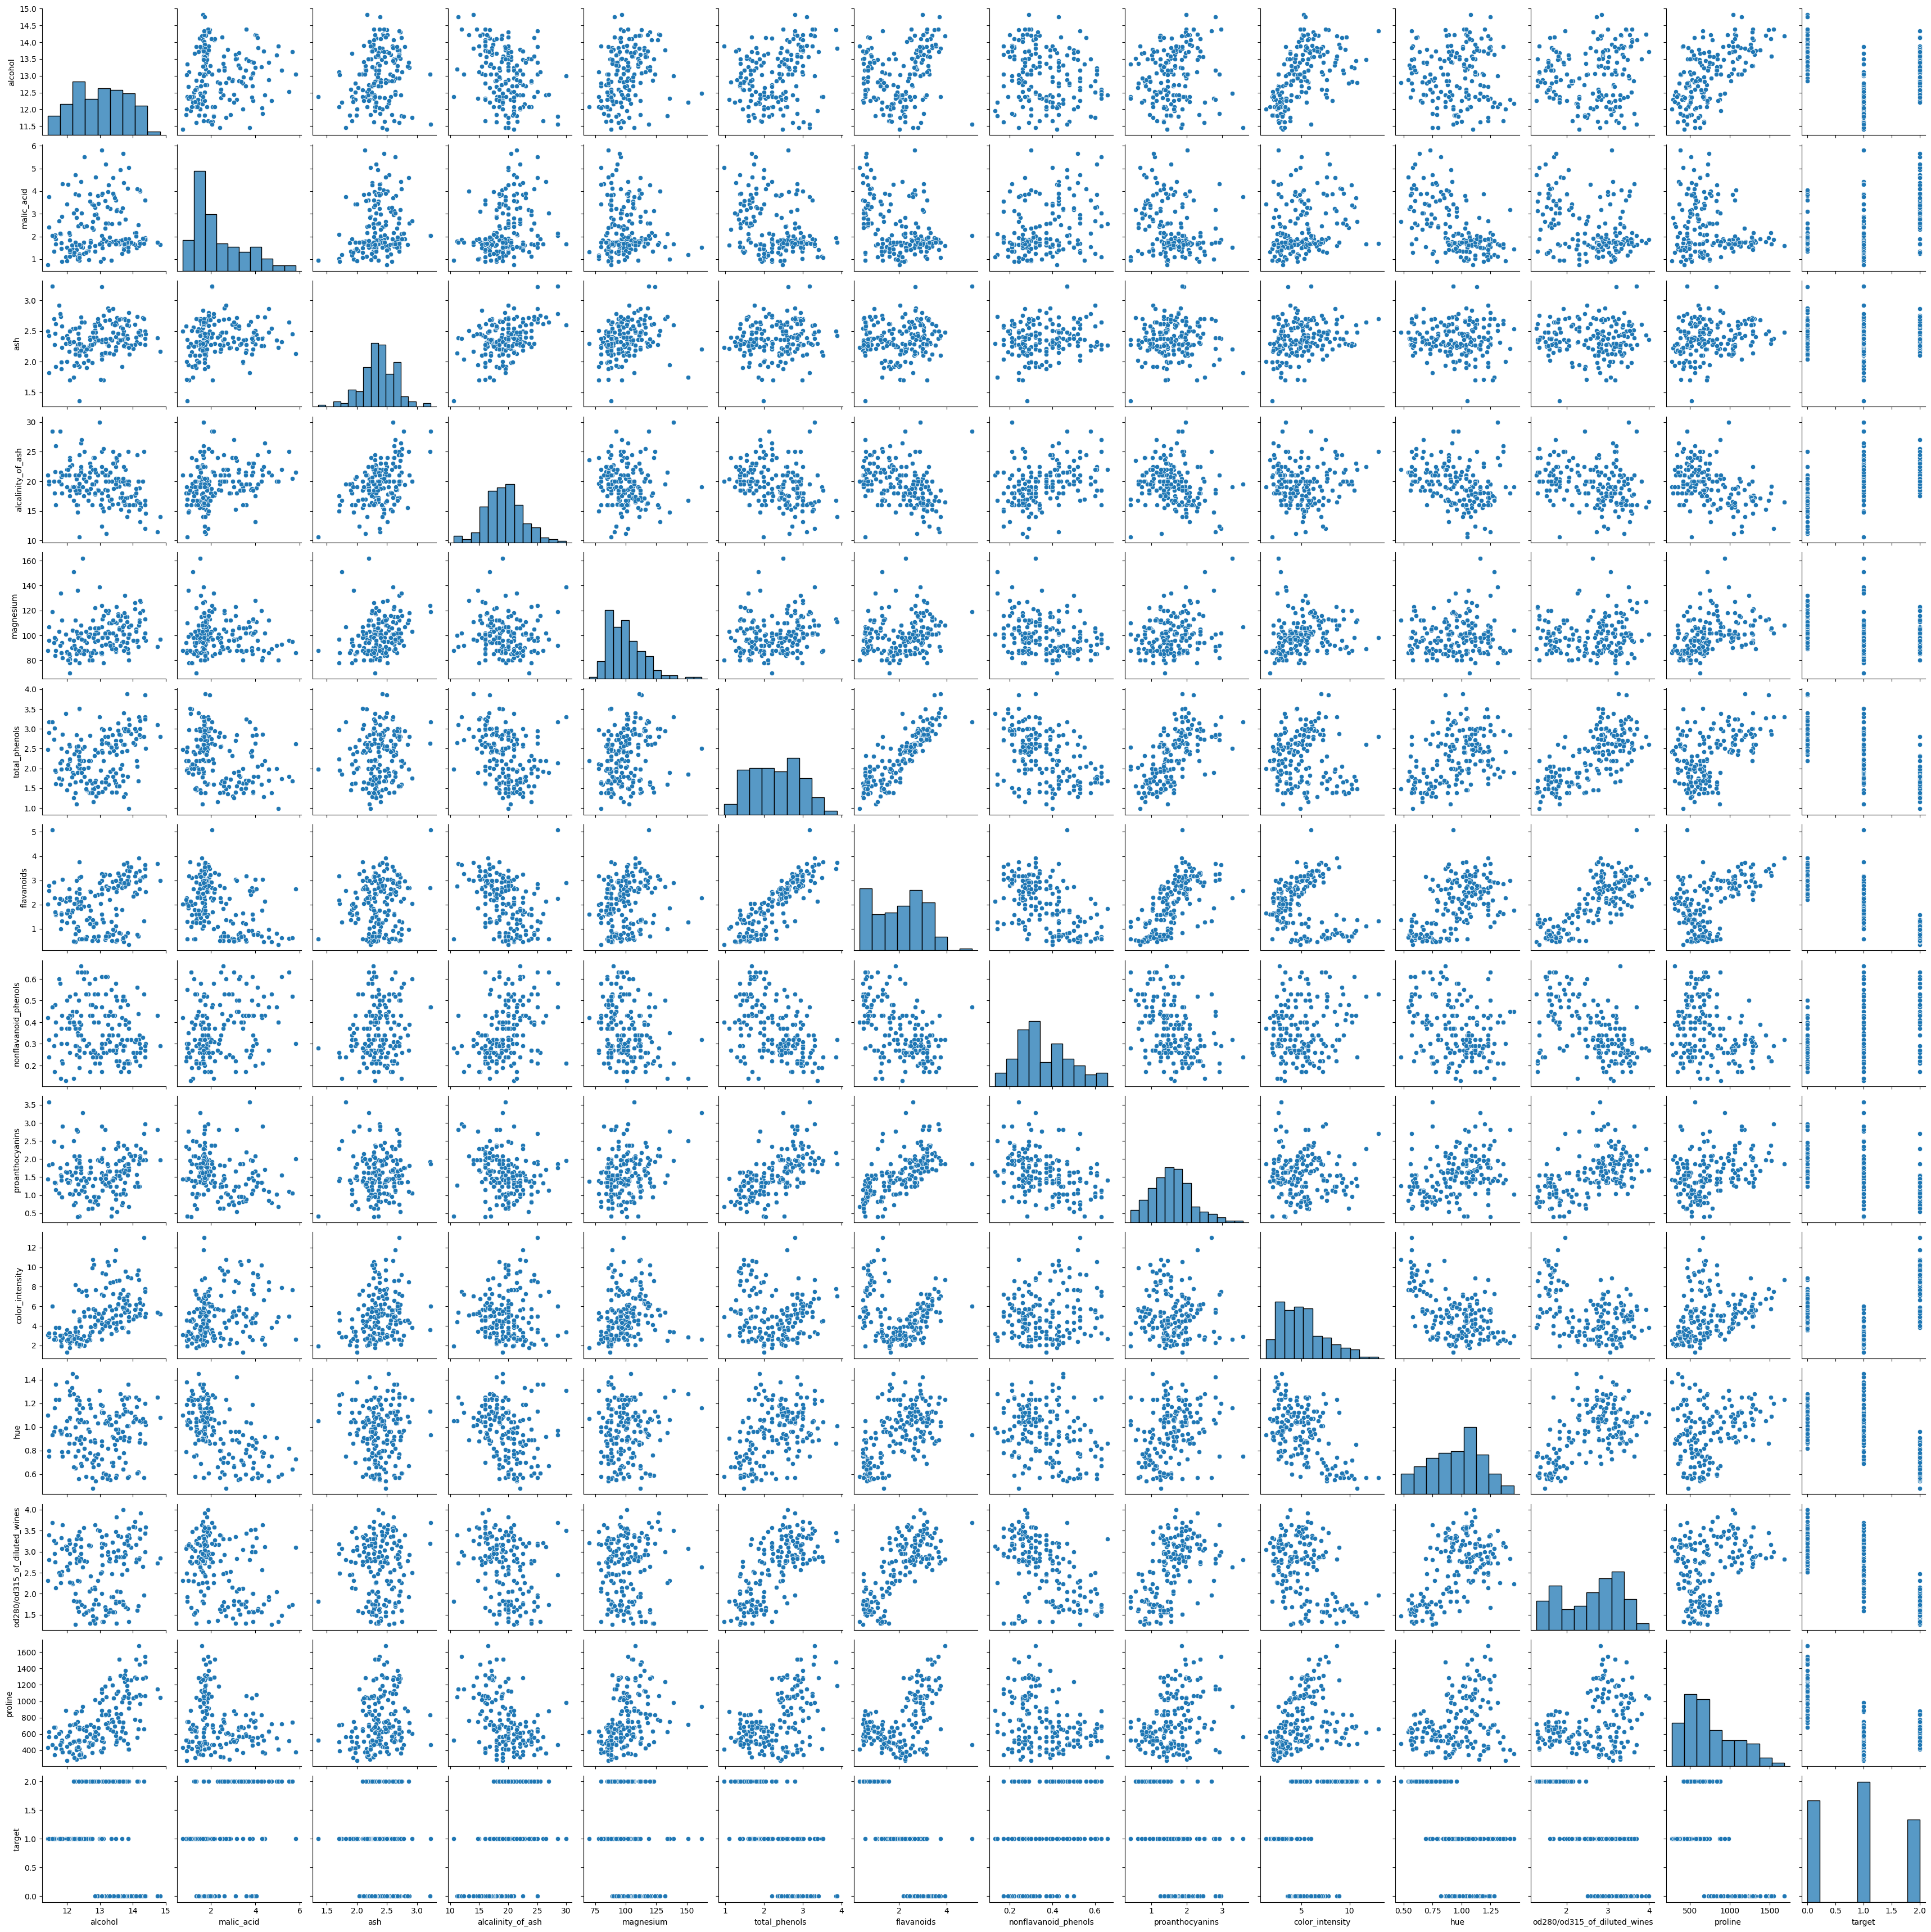

In [59]:
sns.pairplot(df_limpo)

In [56]:
X = df_limpo.drop('target', axis=1)
y = df_limpo['target']

In [57]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

**Regressão Logística**

In [61]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_pred_lr = lr.predict(X_test)

**Decision Tree**

In [71]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
y_pred_dt = dt.predict(X_test)

**Random Forest**

In [69]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
y_pred_rfc = rfc.predict(X_test)

**Naive Bayes - GaussianNB**

In [63]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [65]:
y_pred_nb = nb.predict(X_test)

**K-Nearest Neighbors (KNN)**

In [73]:
K=7
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [74]:
y_pred_knn = knn.predict(X_test)

**SVM (Support Vector Machine)**

In [75]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [76]:
y_pred_svc = svc.predict(X_test)

**Avaliação de Desempenho dos Modelos de Classificação**

Acurácia (accuracy)

Precisão (Precision)

Revocação (Recall)

F1 - Score

Matriz de Confusão

In [103]:
# Regressão Logística
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
classification = classification_report(y_test, y_pred_lr)
matrix = confusion_matrix(y_test, y_pred_lr)

# Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
classification_dt = classification_report(y_test, y_pred_dt)
matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Random Forest
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc, average='weighted')
recall_rfc = recall_score(y_test, y_pred_rfc, average='weighted')
f1_rfc = f1_score(y_test, y_pred_rfc, average='weighted')
classification_rfc = classification_report(y_test, y_pred_rfc)
matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

# Naive Bayes - GaussianB
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_lr, average='weighted')
classification_nb = classification_report(y_test, y_pred_nb)
matrix_nb = confusion_matrix(y_test, y_pred_nb)

# KNeighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
classification_knn = classification_report(y_test, y_pred_knn)
matrix_knn = confusion_matrix(y_test, y_pred_knn)

# SVC
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
classification_svc = classification_report(y_test, y_pred_svc)
matrix_svc = confusion_matrix(y_test, y_pred_svc)

In [104]:
print("Regressão Logística")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 - Score: {f1:.4f}')
print(classification)
print(matrix)
print("Decision Tree")
print(f'Accuracy: {accuracy_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'F1 - Score: {f1_dt:.4f}')
print(classification_dt)
print(matrix_dt)
print("Random Forest")
print(f'Accuracy: {accuracy_rfc:.4f}')
print(f'Precision: {precision_rfc:.4f}')
print(f'Recall: {recall_rfc:.4f}')
print(f'F1 - Score: {f1_rfc:.4f}')
print(classification_rfc)
print(matrix_rfc)
print("Naive Bayes - GaussianNB")
print(f'Accuracy: {accuracy_nb:.4f}')
print(f'Precision: {precision_nb:.4f}')
print(f'Recall: {recall_nb:.4f}')
print(f'F1 - Score: {f1_nb:.4f}')
print(classification_nb)
print(matrix_nb)
print("KNeighbors")
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 - Score: {f1_knn:.4f}')
print(classification)
print(matrix_knn)
print("SVC")
print(f'Accuracy: {accuracy_svc:.4f}')
print(f'Precision: {precision_svc:.4f}')
print(f'Recall: {recall_svc: .4f}')
print(f'F1 - Score: {f1_svc:.4f}')
print(classification_svc)
print(matrix_svc)

Regressão Logística
Accuracy: 0.9815
Precision: 0.9827
Recall: 0.9815
F1 - Score: 0.9816
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
Decision Tree
Accuracy: 0.9815
Precision: 0.9823
Recall: 0.9815
F1 - Score: 0.9814
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[18  1  0]
 [ 0 21  0]
 [ 0 

**Validação Cruzada (5-Fold)**

In [82]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

In [83]:
score_rfc = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=kf)
score_rfc

array([0.92      , 1.        , 1.        , 0.91666667, 1.        ])

In [84]:
score_nb= cross_val_score(GaussianNB(), X_train, y_train, cv=kf)
score_nb

array([0.92      , 0.96      , 0.96      , 0.95833333, 0.95833333])

In [86]:
score_svc = cross_val_score(SVC(), X_train, y_train, cv=kf)
score_svc

array([0.96      , 0.96      , 1.        , 0.95833333, 0.91666667])

In [87]:
print(f'Média RFC: {score_rfc.mean():.4f}')
print(f'Média NB: {score_nb.mean():.4f}')
print(f'Média SVC: {score_svc.mean():.4f}')

Média RFC: 0.9673
Média NB: 0.9513
Média SVC: 0.9590


**Métodos de Conjunto**

**Bagging**

In [88]:
from sklearn.ensemble import BaggingClassifier

In [89]:
d_tree = DecisionTreeClassifier(max_depth=4, random_state=42)

In [90]:
bagging = BaggingClassifier(estimator=d_tree)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                   random_state=42))

In [107]:
y_pred_bagging = bagging.predict(X_test)

**Boosting**

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
boosting = AdaBoostClassifier()
boosting.fit(X_train, y_train)

AdaBoostClassifier()

In [108]:
y_pred_boosting = boosting.predict(X_test)

**Stacking**

In [96]:
from sklearn.ensemble import StackingClassifier

In [97]:
# Instanciar os modelos base
estimators =[('lr', LogisticRegression()),
            ('dt', DecisionTreeClassifier()),
            ('knn', KNeighborsClassifier()),
            ('nb', GaussianNB()),
            ('svc', SVC())]

final_estimator = LogisticRegression()

In [99]:
stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=kf, n_jobs=1, passthrough=False)
stacking.fit(X_train, y_train)

StackingClassifier(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('nb', GaussianNB()), ('svc', SVC())],
                   final_estimator=LogisticRegression(), n_jobs=1)

In [100]:
y_pred_stacking = stacking.predict(X_test)

In [109]:
# Bagging
accuracy_bg = accuracy_score(y_test, y_pred_bagging)
precision_bg = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bg = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bg = f1_score(y_test, y_pred_bagging, average='weighted')
classification_bg = classification_report(y_test, y_pred_bagging)
matrix_bg = confusion_matrix(y_test, y_pred_bagging)
# Boostin
accuracy_boog = accuracy_score(y_test, y_pred_boosting)
precision_boog = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boog = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boog = f1_score(y_test, y_pred_boosting, average='weighted')
classification_boog = classification_report(y_test, y_pred_boosting)
matrix_boog = confusion_matrix(y_test, y_pred_boosting)
# Stacking
accuracy_stk = accuracy_score(y_test, y_pred_stacking)
precision_stk = precision_score(y_test, y_pred_stacking, average='weighted')
recall_stk = recall_score(y_test, y_pred_stacking, average='weighted')
f1_stk = f1_score(y_test, y_pred_stacking, average='weighted')
classification_stk = classification_report(y_test, y_pred_stacking)
matrix_stk = confusion_matrix(y_test, y_pred_stacking)

In [110]:
print("Bagging")
print(f'Accuracy: {accuracy_bg:.4f}')
print(f'Precision: {precision_bg:.4f}')
print(f'Recall: {recall_bg:.4f}')
print(f'F1 - Score: {f1_bg:.4f}')
print(classification_bg)
print(matrix_bg)
print("Boosting")
print(f'Accuracy: {accuracy_boog:.4f}')
print(f'Precision: {precision_boog:.4f}')
print(f'Recall: {recall_boog:.4f}')
print(f'F1 - Score: {f1_boog:.4f}')
print(classification_boog)
print(matrix_boog)
print("Stackin")
print(f'Accuracy: {accuracy_stk:.4f}')
print(f'Precision: {precision_stk:.4f}')
print(f'Recall: {recall_stk:.4f}')
print(f'F1 - Score: {f1_stk:.4f}')
print(classification_stk)
print(matrix_stk)

Bagging
Accuracy: 0.9815
Precision: 0.9823
Recall: 0.9815
F1 - Score: 0.9814
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[18  1  0]
 [ 0 21  0]
 [ 0  0 14]]
Boosting
Accuracy: 0.9259
Precision: 0.9367
Recall: 0.9259
F1 - Score: 0.9250
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.81      0.89        21
           2       0.82      1.00      0.90        14

    accuracy                           0.93        54
   macro avg       0.92      0.94      0.92        54
weighted avg       0.94      0.93      0.92        54

[[19  0  0]
 [ 1 17  3]
 [ 0  0 14]]
Stackin
A